In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sn
import datetime
%matplotlib inline

ModuleNotFoundError: No module named 'seaborn'

In [9]:
# Read in
audio_df = pd.read_csv("Data/audio_features.csv")
audio_df.head()

,Unnamed: 0,Artist,Track,Spotify_ID,danceability,energy,acousticness,instrumentalness,liveness,valence,tempo,key,loudness,mode,duration_ms,time_signature
0,0,Adele,Hello,62PaSfnXSMyLshYJrlTuL3,0.578,0.43,0.33,0,0.0854,0.288,78.991,5,-6.134,0,295502,4
1,1,Justin Bieber,Sorry,402qo6bnZJwCN1RUenyNuM,0.679,0.748,0.0878,0,0.299,0.438,100.035,0,-3.624,0,200787,4
2,2,Drake,Hotline Bling,0wwPcA6wtMf6HUMpIRdeP7,0.891,0.628,0.00258,0.00019,0.0504,0.552,134.966,2,-7.863,1,267067,4
3,3,Justin Bieber,Love Yourself,3dNcOt7h5DuBgahMkOrL1m,0.759,0.401,0.86,0,0.299,0.576,100.126,4,-8.999,1,232627,4
4,4,Justin Bieber,What Do You Mean?,4Vx8DGMNlFt6q3yxVoV8qK,0.832,0.631,0.585,0.000892,0.0838,0.836,125.038,5,-6.19,0,208543,4


In [10]:
# Read in
billboard_df = pd.read_csv("Data/billboard_hot100_16-21.csv")
billboard_df.head()

,Date,Title,Artist,Rank,Is_New,Image,Peak_Posistion,Last_Position,Weeks
0,2016-01-02,Hello,Adele,1,False,NaN,1,1,8
1,2016-01-02,Sorry,Justin Bieber,2,False,NaN,2,2,8
2,2016-01-02,Hotline Bling,Drake,3,False,NaN,2,3,20
3,2016-01-02,Love Yourself,Justin Bieber,4,False,NaN,4,5,5
4,2016-01-02,What Do You Mean?,Justin Bieber,5,False,NaN,1,4,16


In [11]:
# Merge
audio_df_path = "Data/audio_features.csv"
billboard_path = "Data/billboard_hot100_16-21.csv"

audio_df = pd.read_csv(audio_df_path)
billboard_df = pd.read_csv(billboard_path)
audio_df.rename(columns={'Track':'Title'}, inplace=True)
audio_df.drop(columns="Unnamed: 0", inplace=True)

merge_df = pd.merge(audio_df, billboard_df, how="right", on=["Title","Artist"])
merge_df.drop(columns="Image", inplace=True)
merge_df.drop(merge_df.loc[merge_df.Spotify_ID=="not found"].index, inplace = True)
merge_df

,Artist,Title,Spotify_ID,danceability,energy,acousticness,instrumentalness,liveness,valence,tempo,...,loudness,mode,duration_ms,time_signature,Date,Rank,Is_New,Peak_Posistion,Last_Position,Weeks
0,Adele,Hello,62PaSfnXSMyLshYJrlTuL3,0.578,0.43,0.33,0,0.0854,0.288,78.991,...,-6.134,0,295502,4,2016-01-02,1,False,1,1,8
1,Adele,Hello,62PaSfnXSMyLshYJrlTuL3,0.578,0.43,0.33,0,0.0854,0.288,78.991,...,-6.134,0,295502,4,2016-01-09,1,False,1,1,9
2,Adele,Hello,62PaSfnXSMyLshYJrlTuL3,0.578,0.43,0.33,0,0.0854,0.288,78.991,...,-6.134,0,295502,4,2016-01-16,1,False,1,1,10
3,Adele,Hello,62PaSfnXSMyLshYJrlTuL3,0.578,0.43,0.33,0,0.0854,0.288,78.991,...,-6.134,0,295502,4,2016-01-23,2,False,1,1,11
4,Adele,Hello,62PaSfnXSMyLshYJrlTuL3,0.578,0.43,0.33,0,0.0854,0.288,78.991,...,-6.134,0,295502,4,2016-01-30,2,False,1,2,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28595,Tom MacDonald,Snowflakes,6gcRcCkx2K09BucndWZMCS,0.53,0.826,0.0209,0,0.0915,0.277,95.99,...,-6.369,1,229375,4,2021-06-19,71,True,71,0,1
28596,Lil Baby & Lil Durk,That's Facts,6dug6dIV40JMz2myhafHrm,0.884,0.577,0.0843,0,0.0602,0.854,137.032,...,-4.716,1,218611,4,2021-06-19,73,True,73,0,1
28597,Lil Baby & Lil Durk,Please,3zWR0zS9p39c0FVkYkHfVF,0.677,0.634,0.228,0,0.131,0.496,90.268,...,-6.231,1,206254,4,2021-06-19,79,True,79,0,1
28598,"Lil Baby, Lil Durk & Young Thug",Up The Side,2L6lh2RmMs1yz4FQzdbwOn,0.644,0.563,0.0518,0,0.179,0.339,160.106,...,-9.814,0,218417,4,2021-06-19,80,True,80,0,1


In [12]:
billboard_df.sort_values("Weeks", inplace = True)
billboard_df.drop_duplicates(subset = "Title", keep = 'last',
                       inplace = True)
billboard_df

,Date,Title,Artist,Rank,Is_New,Image,Peak_Posistion,Last_Position,Weeks
17595,2019-05-11,Love Me Anyway,P!nk Featuring Chris Stapleton,96,True,NaN,96,0,1
17597,2019-05-11,Stop Snitching,YG,98,True,NaN,98,0,1
23778,2020-07-18,Tunnel Vision (Outro),Pop Smoke,79,True,NaN,79,0,1
8395,2017-08-05,Woman,Kesha Featuring The Dap-Kings Horns,96,True,NaN,96,0,1
25771,2020-12-05,Dis-ease,BTS,72,True,NaN,72,0,1
...,...,...,...,...,...,...,...,...,...
14420,2018-10-06,Perfect,Ed Sheeran,21,False,NaN,1,23,57
11323,2018-03-03,Shape Of You,Ed Sheeran,24,False,NaN,1,24,59
25317,2020-11-07,Circles,Post Malone,18,False,NaN,1,19,61
27123,2021-03-13,I Hope,Gabby Barrett Featuring Charlie Puth,24,False,NaN,3,18,62


In [13]:
billboard_top_ten = billboard_df.nlargest(10, "Weeks")
billboard_top_ten.head(10)

,Date,Title,Artist,Rank,Is_New,Image,Peak_Posistion,Last_Position,Weeks
28514,2021-06-19,Blinding Lights,The Weeknd,15,False,NaN,1,17,79
27123,2021-03-13,I Hope,Gabby Barrett Featuring Charlie Puth,24,False,NaN,3,18,62
25317,2020-11-07,Circles,Post Malone,18,False,NaN,1,19,61
11323,2018-03-03,Shape Of You,Ed Sheeran,24,False,NaN,1,24,59
14420,2018-10-06,Perfect,Ed Sheeran,21,False,NaN,1,23,57
921,2016-03-05,Uptown Funk!,Mark Ronson Featuring Bruno Mars,22,False,NaN,1,0,56
12233,2018-05-05,Wake Me Up!,Avicii,34,False,NaN,4,0,54
23019,2020-05-30,Someone You Loved,Lewis Capaldi,20,False,NaN,1,18,54
20020,2019-11-02,Sunflower (Spider-Man: Into The Spider-Verse),Post Malone & Swae Lee,21,False,NaN,1,19,53
438,2016-01-30,Trap Queen,Fetty Wap,39,False,NaN,2,35,52


In [14]:
x_axis = np.arange(len(billboard_top_ten))
tick_locations = [value+0.4 for value in x_axis]

In [4]:
# Songs on billboard 100 for longest time
plt.figure(figsize=(10,5))
plt.bar(x_axis, billboard_top_ten["Weeks"], color='g', alpha=0.5, align="edge")
plt.xticks(tick_locations, billboard_top_ten["Title"], rotation=75)
plt.xlim(-0.25, len(x_axis)-0.0)
weeks = [55]
plt.ylim(0, max(weeks)+10) 
plt.title("Songs on Billboard 100 The Longest")
plt.xlabel("Song")
plt.ylabel("Number of Weeks")
plt.show()

NameError: name 'x_axis' is not defined

<Figure size 720x360 with 0 Axes>

In [15]:
# Correlation

corr = audio_df[['acousticness','danceability','energy',
'instrumentalness','liveness','tempo','valence]].corr()
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid') 



plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True)

SyntaxError: EOL while scanning string literal (<ipython-input-15-40513bec5625>, line 4)

In [16]:
# Unique Artist Count Billboard
unique_artist = audio_df["Artist"].nunique()
print(unique_artist)

1545


In [17]:
# Artists with most songs in top 100
top_artists = audio_df['Artist'].value_counts()[:10]
top_artists.head(10)

Drake                         71
Taylor Swift                  60
Lil Uzi Vert                  37
YoungBoy Never Broke Again    36
Ariana Grande                 36
The Weeknd                    34
J. Cole                       34
Future                        34
Post Malone                   27
Juice WRLD                    26
Name: Artist, dtype: int64

In [18]:
songs = [71, 60, 37, 36, 36, 34, 34, 34, 27, 26]
x_axis = np.arange(len(songs))
print(x_axis)

[0 1 2 3 4 5 6 7 8 9]


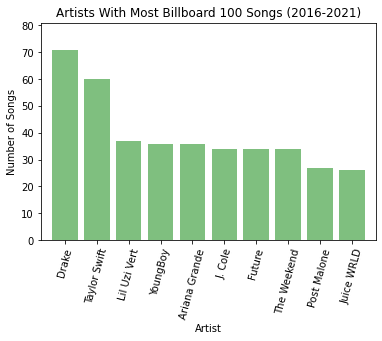

In [21]:
# Plotting Bar Chart
plt.bar(x_axis, songs, color = 'g', alpha=0.5,align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Drake", "Taylor Swift", "Lil Uzi Vert", "YoungBoy", "Ariana Grande",
       "J. Cole", "Future", "The Weekend",
       "Post Malone", "Juice WRLD"], rotation = 75)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(songs)+10) 
plt.title("Artists With Most Billboard 100 Songs (2016-2021)")
plt.xlabel("Artist")
plt.ylabel("Number of Songs")
plt.savefig("Figures/Top_Artists.png",dpi=100)

In [ ]:
# New Tracks per Week
new_songs = billboard_df


In [ ]:

artist_list = top_artists.index[:10]
print(artist_list)
df_artists = merge_df[merge_df.isin(artist_list)][['Artist','Date','energy']].groupby(['Artist','energy']).count().reset_index()
df_artists.rename(columns={'energy':'Song_Count'}, inplace=True)
df_artists.head(10)

In [ ]:
x = np.arange(0, 4 * np.pi, 0.1)
y = np.sin(x)
plt.figure(figsize=(20,10))
plt.plot('Date','Song_Count', color='g', data=df_artists)
plt.title('Artists With Most Songs')
plt.xlabel('Song_Count')
plt.ylabel('Date')
plt.legend(['Drake','Taylor Swift'], loc = 0)

In [ ]:
billboard_df2 = pd.read_csv("Data/billboard_hot100_16-21.csv")
billboard_df2.head()

In [ ]:
billboard_df2.Is_New.value_counts()

In [ ]:
new_songs = billboard_df2.Is_New.sum()
new_songs

In [ ]:
repeat_songs = (~billboard_df2.Is_New).sum()
repeat_songs

In [ ]:
billboard_df2['Year'] = pd.DatetimeIndex(billboard_df2['Date']).year
billboard_df2.head()

In [ ]:
year = billboard_df2['Year']

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.plot(billboard_df2['Year'], billboard_df2['Is_New'],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="News Songs",
       title="New Songs Per Year")

plt.show()